In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [210]:
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive
import matplotlib as mpl
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

In [220]:
products = pd.read_csv("cleanproducts.csv")
orders = pd.read_csv("cleanorders.csv")
customers = pd.read_csv("cleancustomers.csv")
payments = pd.read_csv("cleanpayments.csv")
items = pd.read_csv("cleanitems.csv")

### Merge cleancustomers, cleanpayments and cleanorders together using the primary keys

In [221]:
customers_orders = customers.merge(orders, how = "inner", left_on = "customer_id", right_on = "customer_id")

In [222]:
customers_orders.head()

,Unnamed: 0_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [223]:
customers_o_p = customers_orders.merge(payments, how="inner", left_on="order_id", right_on = "order_id")

In [224]:
customers_o_p.head()

,Unnamed: 0_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0,payment_sequential,payment_type,payment_installments,payment_value
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,19778,1,credit_card,2,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,33639,1,credit_card,8,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,73071,1,credit_card,7,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,6981,1,credit_card,1,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,82770,1,credit_card,8,252.25


#### Drop unnecessary columns

In [225]:
customers_o_p.drop(["Unnamed: 0_x", "Unnamed: 0_y", "Unnamed: 0"], axis = 1, inplace=True )

In [226]:
customers_o_p.to_csv("customers_o_p.csv")

In [227]:
customers_o_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
customer_id                      100739 non-null object
customer_unique_id               100739 non-null object
customer_zip_code_prefix         100739 non-null int64
customer_city                    100739 non-null object
customer_state                   100739 non-null object
order_id                         100739 non-null object
order_status                     100739 non-null object
order_purchase_timestamp         100739 non-null object
order_approved_at                100739 non-null object
order_delivered_carrier_date     100739 non-null object
order_delivered_customer_date    100739 non-null object
order_estimated_delivery_date    100739 non-null object
payment_sequential               100739 non-null int64
payment_type                     100739 non-null object
payment_installments             100739 non-null int64
payment_value                    100739 non-null flo

In [238]:
transaction_data =customers_o_p[["customer_unique_id", "order_purchase_timestamp", "payment_value"]]

In [239]:
transaction_data['date'] = pd.to_datetime(customers_o_p['order_purchase_timestamp']).dt.date

In [240]:
transaction_data = transaction_data.drop('order_purchase_timestamp',axis=1)

In [241]:
transaction_data.head()

,customer_unique_id,payment_value,date
0,861eff4711a542e4b93843c6dd7febb0,146.87,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,335.48,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,157.73,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,173.30,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,252.25,2018-07-29


### RFM Matrix

In [243]:
summary= summary_data_from_transaction_data(transaction_data, "customer_unique_id", "date", monetary_value_col = "payment_value")

In [244]:
summary

,frequency,recency,T,monetary_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,111.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,114.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,537.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,321.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,288.0,0.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,447.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,262.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,568.0,0.0


count    93341.000000
mean         0.023880
std          0.177228
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: frequency, dtype: float64
0.9065704444157675


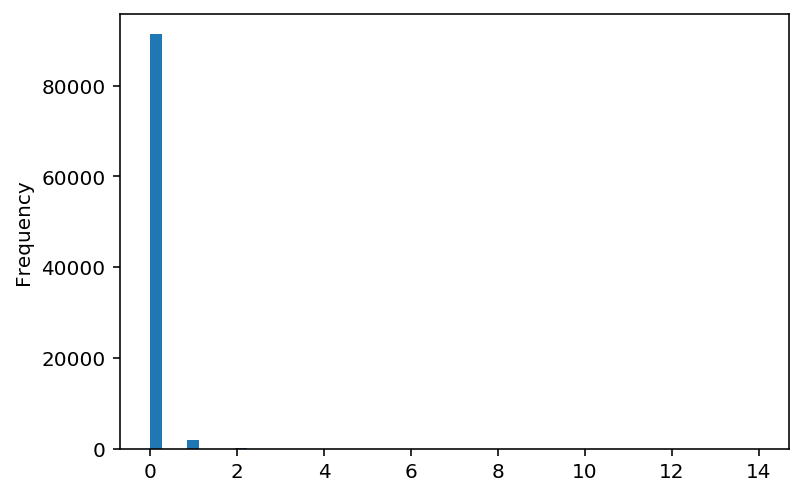

In [267]:
### THIS PLOT GOT PROBLEM
summary["frequency"].plot(kind="hist", bins=50)
print(summary["frequency"].describe())
print(sum(summary["frequency"] == 0)/float(len(model1)))

count    93341.000000
mean         2.642869
std         24.996357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        633.000000
Name: recency, dtype: float64
0.9065704444157675


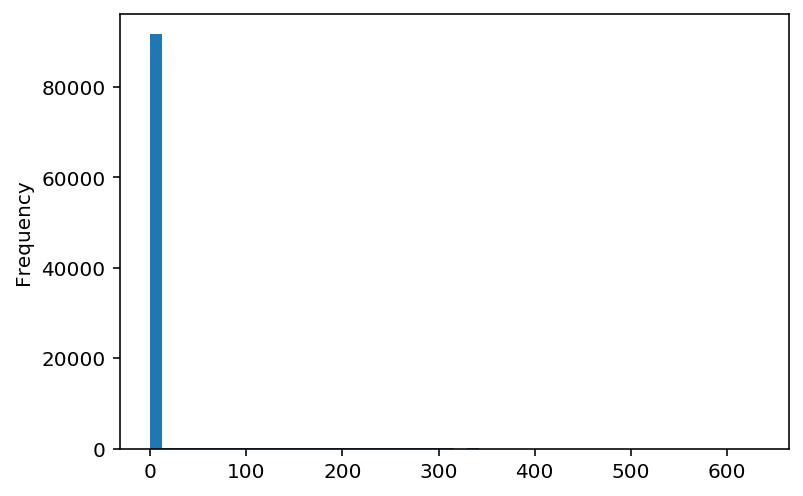

In [246]:
### THIS PLOT GOT PROBLEM
summary["recency"].plot(kind="hist", bins=50)
print(summary["recency"].describe())
print(sum(summary["recency"] == 0)/float(len(model1)))

### Visualizing Frequency and Recency Matrix

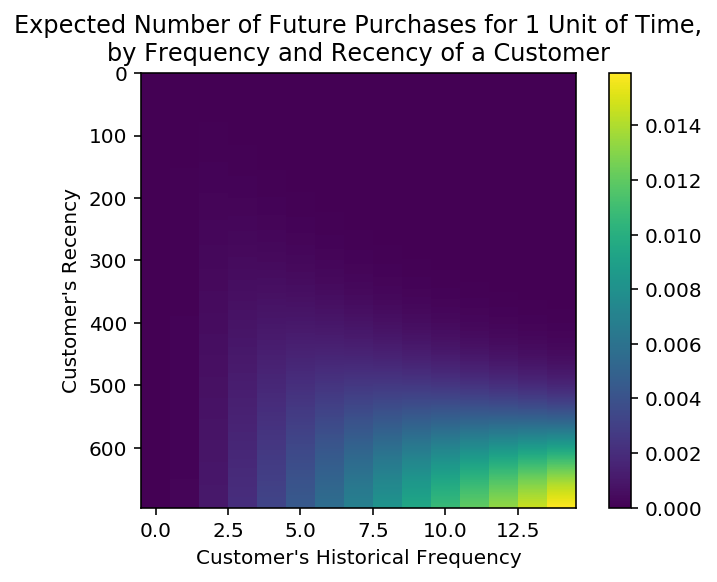

In [247]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary["frequency"], summary["recency"], summary["T"], )
plot_frequency_recency_matrix(bgf)




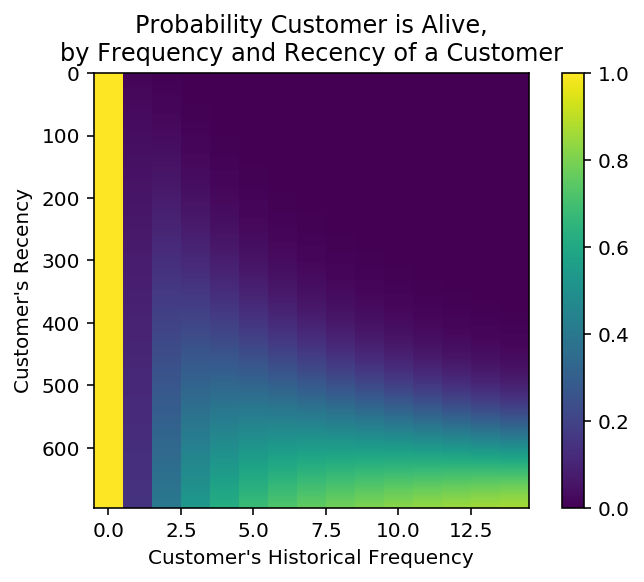

In [248]:
plot_probability_alive_matrix(bgf)

#### Customers that will purchase in the next 30 days 

In [270]:
t = 30
summary["predicted_purchases"] =  bgf.conditional_expected_number_of_purchases_up_to_time(t, summary["frequency"], summary["recency"], summary["T"])
summary.sort_values(by="predicted_purchases").tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
customer_unique_id,,,,,
34b0cd95480e55c2a701293a2b9671b3,2.0,125.0,126.0,29.825000,0.118671
63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,475.0,135.432000,0.119707
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,311.0,381.745000,0.126641
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,0.135248
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,0.150647
6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,344.0,133.412000,0.167277
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,0.168927
dc813062e0fc23409cd255f7f53c7074,5.0,418.0,424.0,151.606000,0.197394
394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,250.0,149.282500,0.209002


#### Finding out customers that will repeat purchase 0,1,2,3,4,6, times in the future

D:\Anaconda\lib\site-packages\lifetimes\generate_data.py:54: RuntimeWarning: overflow encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


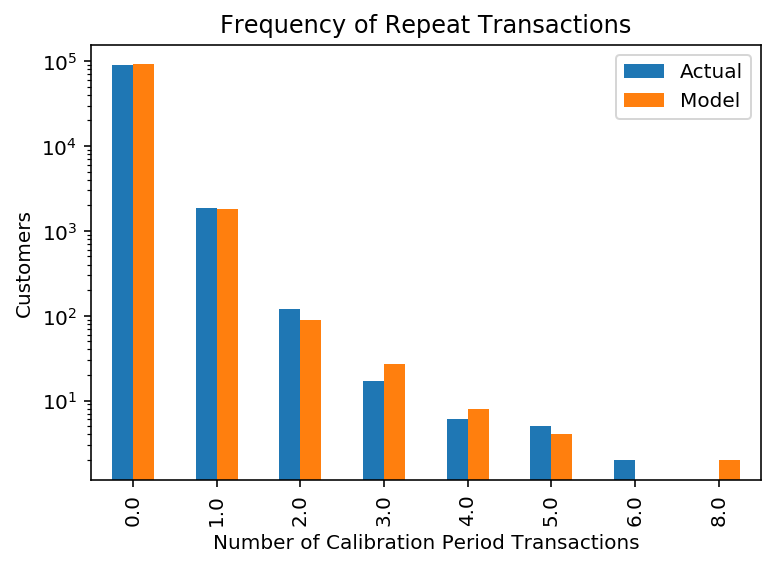

In [251]:
plot_period_transactions(bgf).set_yscale('log')

### Model Testing

In [252]:
summary_cal_holdout = calibration_and_holdout_data(transaction_data, "customer_unique_id", "date",
calibration_period_end="2017-12-19",
observation_period_end="2018-01-12")
print(summary_cal_holdout.head())

                                  frequency_cal  recency_cal  T_cal  \
customer_unique_id                                                    
0000f46a3911fa3c0805444483337064            0.0          0.0  284.0   
0000f6ccb0745a6a4b88665a16c9f078            0.0          0.0   68.0   
0004aac84e0df4da2b147fca70cf8255            0.0          0.0   35.0   
0005e1862207bf6ccc02e4228effd9a0            0.0          0.0  290.0   
0006fdc98a402fceb4eb0ee528f6a8d4            0.0          0.0  154.0   

                                  frequency_holdout  duration_holdout  
customer_unique_id                                                     
0000f46a3911fa3c0805444483337064                0.0                24  
0000f6ccb0745a6a4b88665a16c9f078                0.0                24  
0004aac84e0df4da2b147fca70cf8255                0.0                24  
0005e1862207bf6ccc02e4228effd9a0                0.0                24  
0006fdc98a402fceb4eb0ee528f6a8d4                0.0                24 

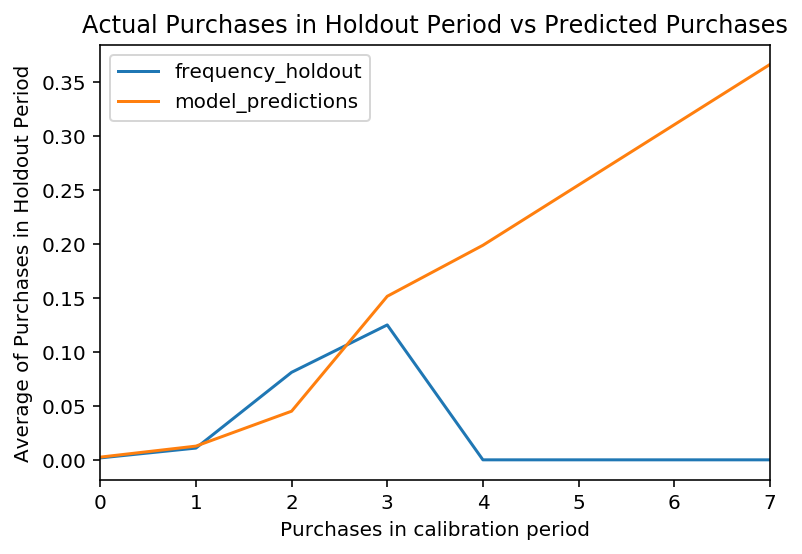

In [253]:
bgf.fit(summary_cal_holdout["frequency_cal"], summary_cal_holdout["recency_cal"], summary_cal_holdout["T_cal"])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

#### Predicting an individual customer's future purchases the next 30 days

In [266]:
t = 30
individual = summary.loc["5c2991dbd08bbf3cf410713c4de5a0b5"]
bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])

0.005692936295878043

#### The model predicts that customer’s (5c2991dbd08bbf3cf410713c4de5a0b5) future transaction is 0.00569 in 30 days.